In [1]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import networkx as nx # for plotting network schematic

# import powerlaw
import scipy.stats as stats
from scipy.optimize import curve_fit
import scipy.io as sio

from matplotlib import colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.gridspec as gridspec
import  matplotlib.markers as mark

from matplotlib.legend_handler import HandlerPatch
import matplotlib.patches as mpatches

import os

from matplotlib.legend_handler import HandlerCircleCollection
from os.path import expanduser

In [2]:
# graphical properties
plt.rcParams["axes.edgecolor"] = "k"
plt.rcParams["axes.facecolor"] = "w"
plt.rcParams["axes.linewidth"] = "0.8"
plt.rcParams.update({'font.size': 7})
plt.rcParams['savefig.dpi'] = 300

plt.rcParams['pdf.fonttype'] = 42 # prepare as vector graphic
plt.rcParams['ps.fonttype'] = 42

plt.rcParams["font.family"] = "Helvetica"

In [3]:
# paths
save_fig_path = '../figs/'

load_path =  '../paper_figures_data/fig4/'
abc_path = '../paper_figures_data/fig4/'

- functions

In [4]:
def sing_exp(x, a, t1):
    '''
    single exponential
    '''
    return a * np.exp(-x/t1) 

def double_exp(x, a, b, t1, t2):
    '''
    double exponential
    '''
    return a * (1-b) * np.exp(-x/t1) + a * (b) * np.exp(-x/t2) 

def sing_exp_oscil(x, a, t1, coef, phase):
    '''
    single exponential mixed with oscillation with f=2
    '''
    f = 2
    return a * (coef * np.exp(-x/t1)  + (1-coef) * np.sqrt(2)*np.sin(phase + 2* np.pi*0.001 * f * x))

# AC of branching network

In [5]:
binSize = 1

# single OU on branching AC
ac_br =  np.load(load_path + 'br096_fullCon_T500_tr100_b0025_a0005.npy')
data_map =  np.load(load_path + 'best_abcFit_linDist_br096_T500_fitlag50_step30_3.npy', allow_pickle=True)
ac_map = data_map[0]
abc =  np.load(abc_path + 'br096_fullConn_T500_tr100_lag50_norm_steps30.npy', allow_pickle=True)
step = 30

class HandlerSquare(HandlerPatch):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        center = xdescent + 0.5 * (width - height), ydescent
        p = mpatches.Rectangle(xy=center, width=height,
                               height=height, angle=0.0)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]    

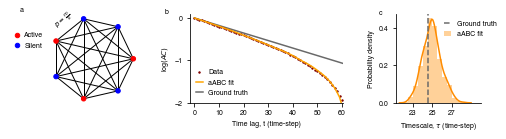

In [6]:
cm = 1/2.54  # centimeters in inches
fig = plt.figure(figsize=(19.5*cm, 4.16*cm))
fig.subplots_adjust(hspace=1.8, wspace=3.2)


ft = 7
fleg = 7
fleg3 = 7
fs = 7

cABC = 'darkorange'
cABC2 = 'r'
cABC3 = 'gold' 
# cAC = plt.cm.Reds(250)
cAC = 'maroon'
# cMAP1 = 'DarkKhaki'
cMAP = 'orange'
cAccR = 'deepskyblue'
cErr = 'r'
ctheor = 'DimGray'
cExp = 'c'
# cNode = 'r'
cNode = ['r', 'b', 'b','r', 'b', 'r','b']

ss = 2
a = 0.4 #transparency
lw = 1.5
lw2 = 1.5
lNet = 1.

hl = 1

timeLag_label = r'Time lag, t (time-step)'
log_ac_label = r'log$(AC)$'
ac_label = r'$AC$'
prob_label = r'Probability density'

x = 2
y = 7

#________________________________________________________
ax = plt.subplot2grid((x,y), (0, 0), colspan=2,rowspan=2)
ax.text(-1.8,1.15,'a',color='k',fontsize=ft, weight='bold')
nedges = 7
G = nx.complete_graph(nedges)
pos = nx.circular_layout(G)
nx.draw(G, pos, node_color = cNode, node_size=20, width = lNet)
plt.text(-1,0.8,r'$p = \frac{m}{k}$',rotation = 43, fontsize = ft, color = 'k')

proxy1 = [plt.Circle((0, 0), 0.2, color='r')]
proxy2 = [plt.Circle((0, 0), 0.2, color='b')]

sNode = 20
proxy1 = [plt.scatter(0.2, 1, color='w', s = sNode)] # making a white scatter plot to add legends
proxy2 = [plt.scatter(0.2, 1, color='w', s = sNode)]


plt.legend([proxy1[0], proxy2[0]], ["Active", "Silent"], \
           frameon = False, \
           fontsize = fleg3, bbox_to_anchor=(-0.03,.87), handletextpad=0.03)
leg = ax.get_legend()
leg.legendHandles[0].set_color('red')
leg.legendHandles[1].set_color('b')

#________________________________________________________
ax = plt.subplot2grid((x,y), (0, 2), colspan=3,rowspan=2)
ax.text(-12,0.1,'b',color='k',fontsize=ft, weight='bold')

tau = 24.5
binLags = np.arange(0, 100 + binSize , binSize)
ac = np.exp(-binLags/tau)
plt.plot(binLags[ac>0],np.log10(ac[ac>0]),'-',color = ctheor ,label=r'Ground truth',\
        linewidth = lw, zorder = 0)

ac = ac_br
ac = ac/ac[0]
binLags = np.arange(0, 100 , binSize)
plt.scatter(binLags[ac>0],np.log10(ac[ac>0]),color = cAC ,label=r'Data', s = ss)

ac = ac_map
ac = ac/ac[0]
binLags = np.arange(0, 100 + binSize , binSize)
plt.plot(binLags[ac>0],np.log10(ac[ac>0]),'-',color = cMAP ,label=r'aABC fit',\
        linewidth = lw)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1],frameon = False, fontsize = fleg, loc = 'lower left', \
          bbox_to_anchor=(0.0, 0.0), handlelength = hl)
plt.xlabel(timeLag_label)
plt.ylabel(log_ac_label)
plt.ylim([-2,0.1])
plt.xlim([-2,60.5])
plt.yticks(np.arange(-2,0.1,1))

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# #________________________________________________________
ax = plt.subplot2grid((x,y), (0, 5), colspan=2,rowspan=2)
ax.text(19.5,.47,'c',color='k',fontsize=ft, weight='bold')

abc = abc
step = step
tau1 = abc[step - 1][0][0]
ax.hist(tau1, bins = np.arange(22,30,0.5), facecolor= cABC, density=True, alpha = a, \
        label = r'aABC fit')
sns.kdeplot(tau1, data2=None, shade=False, vertical=False, color = cABC)


plt.axvline(24.5, linestyle = '--', color = ctheor, label = r'Ground truth', linewidth = lw)

plt.xlabel(r'Timescale, $\tau$ (time-step)')
plt.ylabel(prob_label)
plt.xticks([23,25,27])
ax.yaxis.set_major_locator(plt.MaxNLocator(3))

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(frameon = False, fontsize = fleg, bbox_to_anchor=(0.5, 1), handlelength = hl)


# plt.savefig(save_fig_path+'fig4.pdf', bbox_inches='tight')